# EDA and Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/alter_psychologists_list_anonymous_dataset.csv", index_col=0)

In [3]:
df.sample(5).T

,677,640,620,417,601
city,Санкт-Петербург,Минеральные Воды,Москва,Пермь,Тверь
city_details,м. Новочеркасская,NaN,м. Трубная / Цветной бульвар,NaN,NaN
experience,21,11,14,3,8
private_experience,22,0,22,11,7
alter_experience,1,0,4,1,2
sex,F,F,F,F,F
age,50.0,43.0,45.0,33.0,49.0
marital_status,married,married,single,married,married
has_children,False,True,False,True,True
allow_time_request,True,True,True,True,True


In [4]:
#Датасет на 751, есть nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 750
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    751 non-null    object 
 1   city_details            465 non-null    object 
 2   experience              751 non-null    int64  
 3   private_experience      751 non-null    int64  
 4   alter_experience        751 non-null    int64  
 5   sex                     743 non-null    object 
 6   age                     715 non-null    float64
 7   marital_status          640 non-null    object 
 8   has_children            630 non-null    object 
 9   allow_time_request      751 non-null    bool   
 10  experimentGroup         751 non-null    bool   
 11  working_with.family     751 non-null    bool   
 12  working_with.adults     751 non-null    bool   
 13  working_with.lgbt       751 non-null    bool   
 14  working_with.believer   751 non-null    bool   

In [5]:
#удалим неактуальные признаки
df = df.drop(["city_details", "allow_time_request", "experimentGroup"], axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience,751.0,7.930759,4.900394,1.0,4.0,7.0,10.0,30.0
private_experience,751.0,5.532623,5.664268,0.0,0.0,5.0,9.0,34.0
alter_experience,751.0,1.154461,1.237246,0.0,0.0,1.0,2.0,5.0
age,715.0,39.216783,8.030352,24.0,33.0,38.0,44.0,72.0
education_count,751.0,7.110519,4.241985,1.0,4.0,6.0,9.0,30.0
competences_count,751.0,5.376831,3.567325,2.0,4.0,4.0,4.0,31.0
methods_count,751.0,1.707057,0.885101,1.0,1.0,1.0,2.0,7.0
expertise_count,751.0,3.115846,1.887828,0.0,2.0,3.0,5.0,9.0
features_of_work_count,751.0,11.841545,3.638341,0.0,9.0,12.0,14.0,22.0
price,751.0,4134.908123,1608.448598,1500.0,3000.0,4000.0,5000.0,20000.0


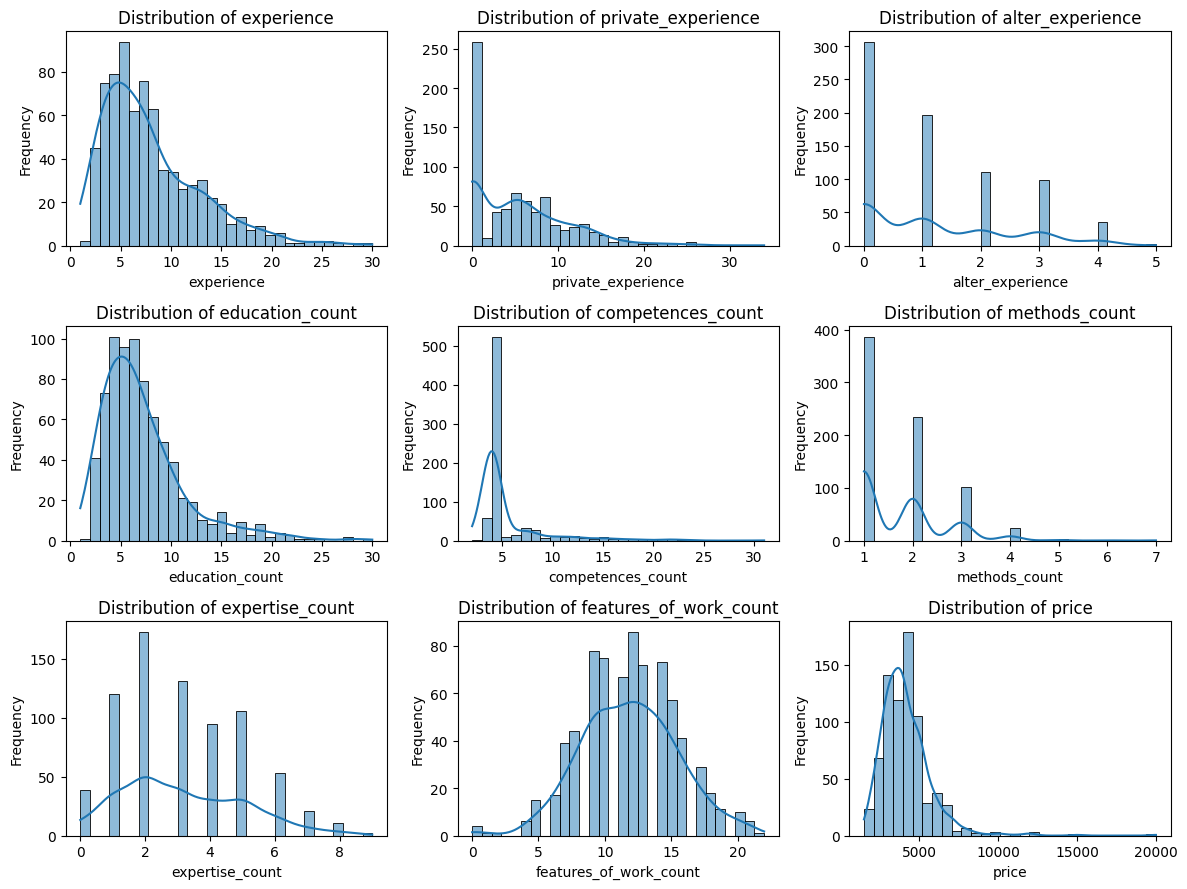

       experience  private_experience  alter_experience  education_count  \
count  751.000000          751.000000        751.000000       751.000000   
mean     7.930759            5.532623          1.154461         7.110519   
std      4.900394            5.664268          1.237246         4.241985   
min      1.000000            0.000000          0.000000         1.000000   
25%      4.000000            0.000000          0.000000         4.000000   
50%      7.000000            5.000000          1.000000         6.000000   
75%     10.000000            9.000000          2.000000         9.000000   
max     30.000000           34.000000          5.000000        30.000000   

       competences_count  methods_count  expertise_count  \
count         751.000000     751.000000       751.000000   
mean            5.376831       1.707057         3.115846   
std             3.567325       0.885101         1.887828   
min             2.000000       1.000000         0.000000   
25%            

In [7]:
# Выбираем некоторые признаки для оценки распределения. Смотрим гистограмму
numeric_features = ['experience', 'private_experience', 'alter_experience', 'education_count',\
                    'competences_count', 'methods_count', 'expertise_count', 'features_of_work_count', 'price' ]

fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('distribution_plots.png')
plt.show()

numeric_stats = df[numeric_features].describe()
print(numeric_stats)

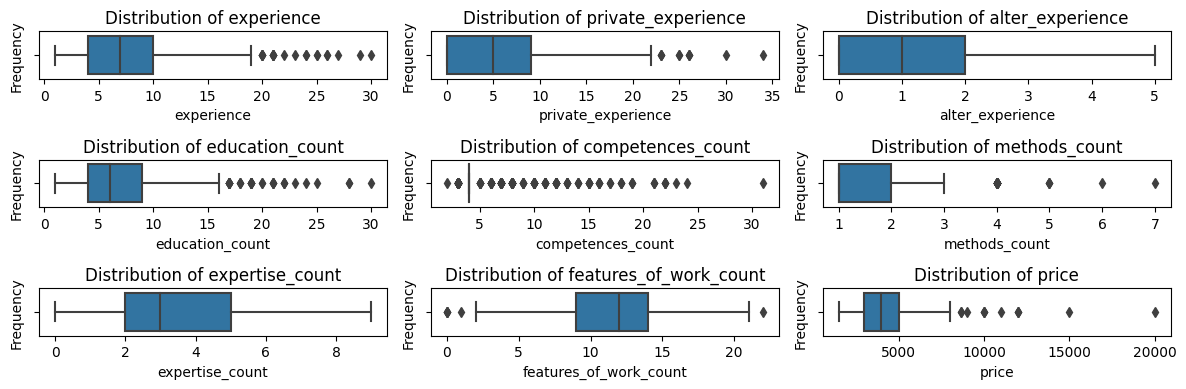

In [8]:
# Можно считать резкие значения за выброс. Строим boxplot.
numeric_features = ['experience', 'private_experience', 'alter_experience', 'education_count',\
                    'competences_count', 'methods_count', 'expertise_count', 'features_of_work_count', 'price' ]

fig, axes = plt.subplots(3, 3, figsize=(12, 4))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

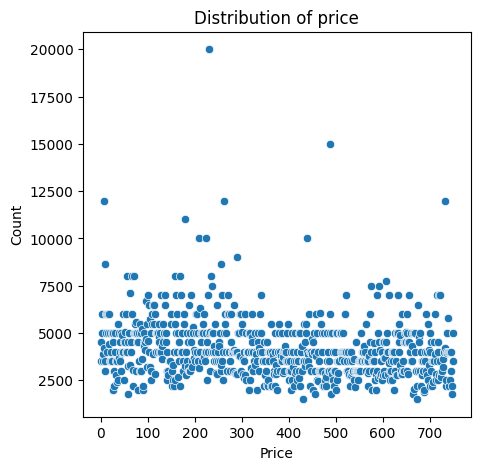

In [9]:
# Смотрим выбросы в "price"
plt.figure(figsize=(5, 5))
sns.scatterplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of price')
plt.savefig('distribution_of_price_plot.png')
plt.show()

In [10]:
# Убираем выбросы в "price" все выше 8_000
df = df[df['price'] <= 8_000]

<Axes: ylabel='price'>

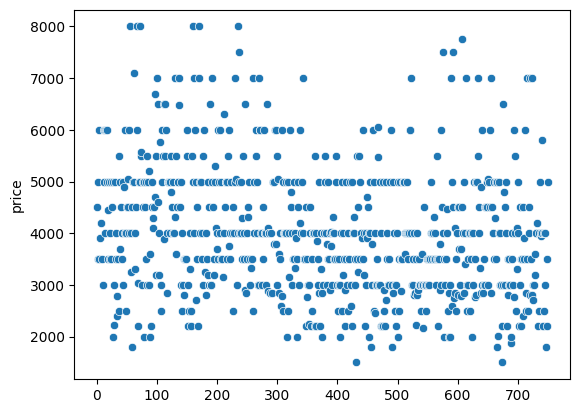

In [11]:
sns.scatterplot(df['price'])

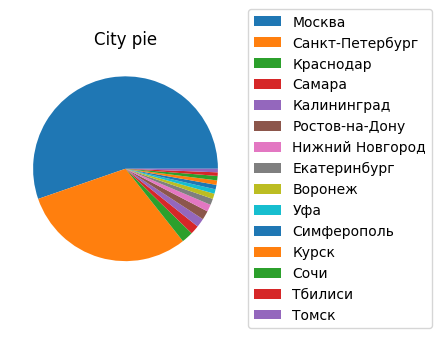

In [12]:
# Получаем pie диаграму городов и выбираем топ 15
city_counts = df['city'].value_counts()[:15]
plt.figure(figsize=(3, 3))
plt.pie(city_counts)
plt.title('City pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.savefig('City_distribution_pie.png')
plt.show()

<Figure size 400x400 with 0 Axes>

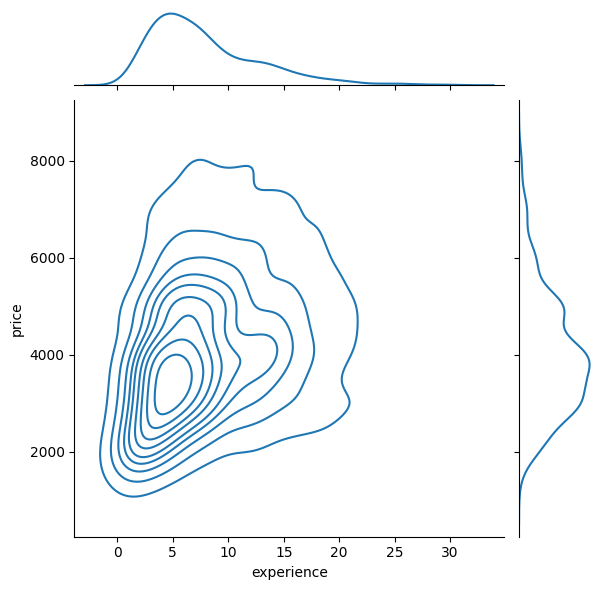

In [13]:
# Создаем график совместного распределения
plt.figure(figsize=(4, 4))
sns.jointplot(data=df, x="experience", y="price", kind="kde", height=6)
plt.show()

<Axes: xlabel='experience', ylabel='price'>

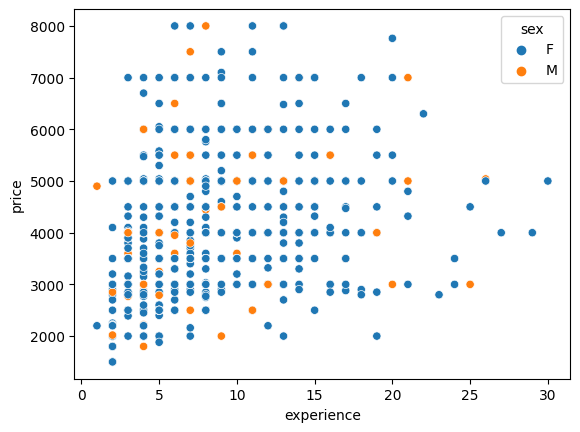

In [14]:
sns.scatterplot(data=df, x="experience", y="price", hue="sex")

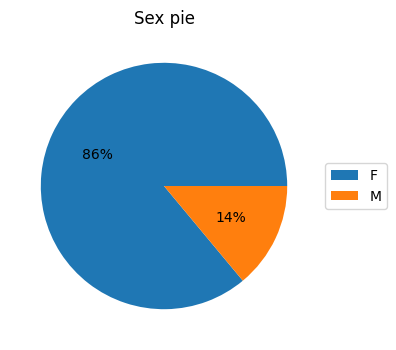

In [15]:
# Получилось что в датасете женщин дольшинство 
city_counts = df['sex'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(city_counts, autopct='%.0f%%')
plt.title('Sex pie')
plt.legend(city_counts.index, bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Оптимизируем датасет по памяти 

In [16]:
df_array = df.replace({False: 0, True: 1, "F": 1, "M": 0, "married": 1, "single": 0})

In [17]:
df_array["working_with.family"] = df_array["working_with.family"].astype(np.int8)
df_array["working_with.adults"] = df_array["working_with.adults"].astype(np.int8)
df_array["working_with.lgbt"] = df_array["working_with.lgbt"].astype(np.int8)
df_array["working_with.believer"] = df_array["working_with.believer"].astype(np.int8)
df_array["working_with.fem"] = df_array["working_with.fem"].astype(np.int8)
df_array["working_with.foreigner"] = df_array["working_with.foreigner"].astype(np.int8)
df_array["working_with.elderly"] = df_array["working_with.elderly"].astype(np.int8)

df_array["education_count"] = df_array["education_count"].astype(np.int16)
df_array["competences_count"] = df_array["competences_count"].astype(np.int16)
df_array["methods_count"] = df_array["methods_count"].astype(np.int16)
df_array["expertise_count"] = df_array["expertise_count"].astype(np.int16)

df_array["experience"] = df_array["experience"].astype(np.int16)
df_array["private_experience"] = df_array["private_experience"].astype(np.int16)
df_array["alter_experience"] = df_array["alter_experience"].astype(np.int16)
df_array["features_of_work_count"] = df_array["features_of_work_count"].astype(np.int16)

df_array["age"] = df_array["age"].astype(np.float16)
df_array["sex"] = df_array["sex"].astype(np.float16)
df_array["marital_status"] = df_array["marital_status"].astype(np.float16)
df_array["has_children"] = df_array["has_children"].astype(np.float16)

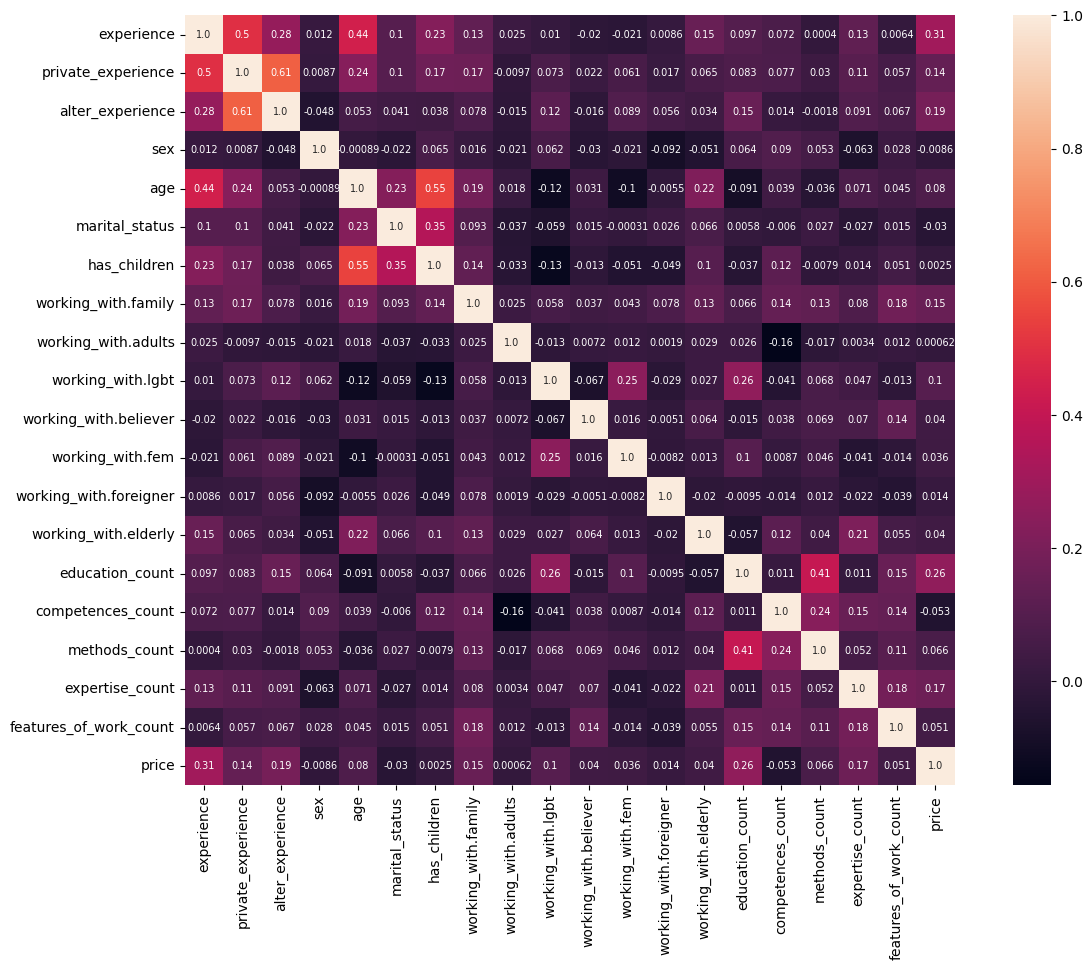

In [18]:
# Создание корреляционной матрицы через heatmap 
correlation_matrix = df_array.drop(["city"], axis=1).corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix,square=True, annot=True, fmt=',.2', annot_kws={"size": 7})
plt.savefig('correlation_matrix.png')
plt.show()

In [19]:
# Можно понять, что корреляция оч. слабые

In [20]:
#Сохраним как pickle
df_array.to_pickle("./data/alter_psychologists_data_cleaning.p")